## Project: Dog Breed Classifier 

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [2]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


Number of faces detected: 1


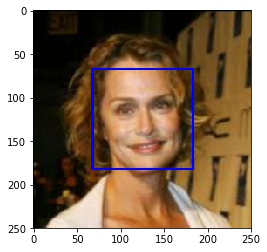

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [5]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_detected = [h for h in human_files_short if face_detector(h)]
human_percentage = len(human_detected) * 1.

dog_detected = [d for d in dog_files_short if face_detector(d)]
dog_percentage = len(dog_detected) * 1.

print("Dog percentage: {}%".format(dog_percentage))
print("Human percentage: {}%".format(human_percentage))

Dog percentage: 11.0%
Human percentage: 98.0%


In [7]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

In [8]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [9]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

In [12]:
### Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_detected2 = [h for h in human_files_short if face_detector(h)]
human_percentage2 = len(human_detected2) * 1.

dog_detected2 = [d for d in dog_files_short if face_detector(d)]
dog_percentage2 = len(dog_detected2) * 1.

print("Dog percentage: {}%".format(dog_percentage2))
print("Human percentage: {}%".format(human_percentage2))

Dog percentage: 11.0%
Human percentage: 98.0%


In [13]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:15<00:00, 53.55it/s]


In [14]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### Define your architecture.

#Layer 1

#Convolution with RELU activation as a function 
model.add(Conv2D(filters=16, kernel_size=5, activation="relu",input_shape=(224, 224, 3)))
#to reduce the amount of parameters and computation in the network
model.add(MaxPooling2D(pool_size=2))
#Dropout added to prevent overfitting
model.add(Dropout(0.2))

#Layer 2

#Convolution with RELU activation as a function (increase the filters numbers to 32)
model.add(Conv2D(filters=32, kernel_size=5, activation="relu",input_shape=(224, 224, 3)))
#to reduce the amount of parameters and computation in the network
model.add(MaxPooling2D(pool_size=2))
#Dropout added to prevent overfitting
model.add(Dropout(0.2))


#Layer 3

#Convolution with RELU activation as a function (increase the filters numbers to 64)
model.add(Conv2D(filters=64, kernel_size=5, activation="relu",input_shape=(224, 224, 3)))
#to reduce the amount of parameters and computation in the network
model.add(MaxPooling2D(pool_size=2))
#Dropout added to prevent overfitting
model.add(Dropout(0.2))

#Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))

#Output Layer
model.add(Dense(133, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 16)      1216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 32)      12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 64)        51264     
__________

In [15]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint  

### specify the number of epochs that you would like to use to train the model.

epochs = 12

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/12
6680/6680 [==============================] - 592s - loss: 4.9078 - acc: 0.0139 - val_loss: 4.7818 - val_acc: 0.0335
Epoch 2/12
6680/6680 [==============================] - 582s - loss: 4.5585 - acc: 0.0407 - val_loss: 4.2829 - val_acc: 0.0659
Epoch 3/12
6680/6680 [==============================] - 626s - loss: 3.9358 - acc: 0.1241 - val_loss: 4.1629 - val_acc: 0.0695
Epoch 4/12
6680/6680 [==============================] - 635s - loss: 2.9931 - acc: 0.2897 - val_loss: 4.2907 - val_acc: 0.0982
Epoch 5/12
6680/6680 [==============================] - 633s - loss: 1.6181 - acc: 0.5835 - val_loss: 5.5523 - val_acc: 0.0862
Epoch 6/12
6680/6680 [==============================] - 632s - loss: 0.6518 - acc: 0.8250 - val_loss: 6.7226 - val_acc: 0.0886
Epoch 7/12
6680/6680 [==============================] - 633s - loss: 0.3423 - acc: 0.9063 - val_loss: 7.8429 - val_acc: 0.0874
Epoch 8/12
6680/6680 [==============================] - 636s - l

In [17]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

In [18]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 8.0144%


In [19]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

In [20]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               68229     
Total params: 68,229.0
Trainable params: 68,229.0
Non-trainable params: 0.0
_________________________________________________________________


In [21]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [22]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s - loss: 12.7967 - acc: 0.1112 - val_loss: 11.2867 - val_acc: 0.1952
Epoch 2/20
6680/6680 [==============================] - 1s - loss: 10.8020 - acc: 0.2398 - val_loss: 10.4411 - val_acc: 0.2527
Epoch 3/20
6680/6680 [==============================] - 1s - loss: 10.1203 - acc: 0.3097 - val_loss: 10.1604 - val_acc: 0.2970
Epoch 4/20
6680/6680 [==============================] - 1s - loss: 9.7975 - acc: 0.3452 - val_loss: 9.8402 - val_acc: 0.3162
Epoch 5/20
6680/6680 [==============================] - 1s - loss: 9.4690 - acc: 0.3747 - val_loss: 9.7683 - val_acc: 0.3293
Epoch 6/20
6680/6680 [==============================] - 1s - loss: 9.2412 - acc: 0.3928 - val_loss: 9.5347 - val_acc: 0.3437
Epoch 7/20
6680/6680 [==============================] - 1s - loss: 9.0288 - acc: 0.4115 - val_loss: 9.3767 - val_acc: 0.3593
Epoch 8/20
6680/6680 [==============================] - 1s - loss: 8.950

In [23]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

In [24]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 39.3541%


In [25]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [26]:
### Obtain bottleneck features from another pre-trained CNN.

bottleneck_features = np.load('bottleneck_features/DogXceptionData.npz')
train_Xception = bottleneck_features['train']
valid_Xception = bottleneck_features['valid']
test_Xception = bottleneck_features['test']

In [27]:
#Define your architecture.

# Create a keras sequential model
Xception_model = Sequential()

# Use the pretrained Xception model without the classification layer
Xception_model.add(GlobalAveragePooling2D(input_shape=train_Xception.shape[1:]))

# Add a custom classification layer for 133 breed classes
Xception_model.add(Dense(133, activation='softmax'))

Xception_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 133)               272517    
Total params: 272,517.0
Trainable params: 272,517.0
Non-trainable params: 0.0
_________________________________________________________________


In [28]:
### Compile the model.
Xception_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [29]:
### Train the model.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception.hdf5', 
                               verbose=1, save_best_only=True)

Xception_model.fit(train_Xception, train_targets, 
          validation_data=(valid_Xception, valid_targets),
          epochs=20, batch_size=128, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 0.75240, saving model to saved_models/weights.best.Xception.hdf5
7s - loss: 1.7337 - acc: 0.6738 - val_loss: 0.7524 - val_acc: 0.8012
Epoch 2/20
Epoch 00001: val_loss improved from 0.75240 to 0.55136, saving model to saved_models/weights.best.Xception.hdf5
2s - loss: 0.5282 - acc: 0.8618 - val_loss: 0.5514 - val_acc: 0.8323
Epoch 3/20
Epoch 00002: val_loss improved from 0.55136 to 0.47436, saving model to saved_models/weights.best.Xception.hdf5
2s - loss: 0.3671 - acc: 0.8958 - val_loss: 0.4744 - val_acc: 0.8467
Epoch 4/20
Epoch 00003: val_loss improved from 0.47436 to 0.45789, saving model to saved_models/weights.best.Xception.hdf5
2s - loss: 0.2861 - acc: 0.9181 - val_loss: 0.4579 - val_acc: 0.8503
Epoch 5/20
Epoch 00004: val_loss improved from 0.45789 to 0.44817, saving model to saved_models/weights.best.Xception.hdf5
2s - loss: 0.2315 - acc: 0.9320 - val_loss: 0.4482 - val_acc: 0.85

In [30]:
### Load the model weights with the best validation loss.
Xception_model.load_weights('saved_models/weights.best.Xception.hdf5')

In [31]:
### Calculate classification accuracy on the test dataset.

Xception_predictions = [np.argmax(Xception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Xception]

# get test accuracy
test_accuracy = 100*np.sum(np.array(Xception_predictions)==np.argmax(test_targets, axis=1))/len(Xception_predictions)
print('Test accuracy: {:.2f}'.format(test_accuracy))

Test accuracy: 86.12


In [32]:
### Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

def Xception_dog_breed(img_path):
    #get Xception bottleneck features
    bnf = extract_Xception(path_to_tensor(img_path))
    #get prediction
    predicted_vector = Xception_model.predict(bnf)
    #return breed with grates confidence
    return dog_names[np.argmax(predicted_vector)]

In [33]:
### algorithm.
### Feel free to use as many code cells as needed.

def show_image(image_path):
    img = cv2.imread(image_path)
    #convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # display the image
    plt.imshow(cv_rgb)
    plt.show()

def classification_algorithm(image_path):
    
    show_image(image_path)
    
    human = face_detector(image_path)
    dog = dog_detector(img_path=image_path)
    
    # predict breed
    breed = Xception_dog_breed(image_path)
        
    if human:
        print("Human detected, who looks like a: {}".format(breed))
    elif dog:
        print("Dog detected, and the breed is {}".format(breed))
    else:
        print("neither dog nor human face detected")

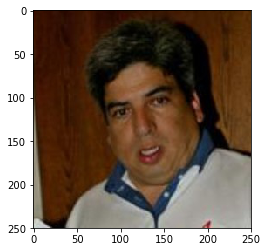

Human detected, who looks like a: Smooth_fox_terrier


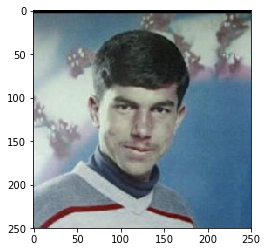

Human detected, who looks like a: Smooth_fox_terrier


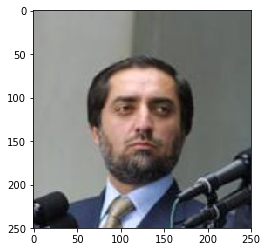

Human detected, who looks like a: Petit_basset_griffon_vendeen


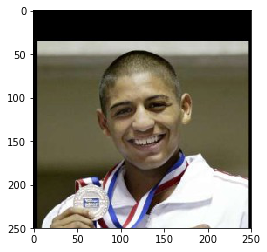

Human detected, who looks like a: Smooth_fox_terrier


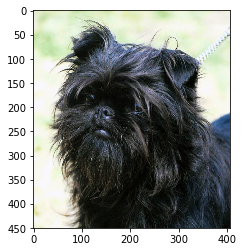

Dog detected, and the breed is Affenpinscher


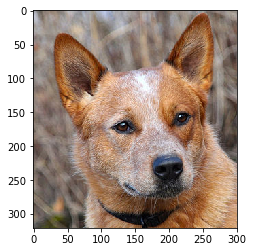

neither dog nor human face detected


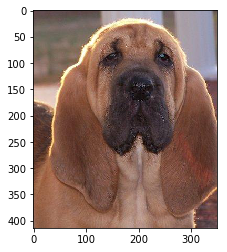

Dog detected, and the breed is Bloodhound


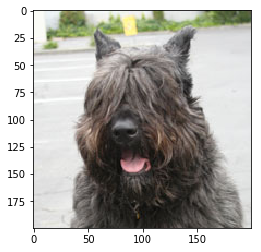

Dog detected, and the breed is Bouvier_des_flandres


In [34]:
## Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

images = glob("my_images/*.jpg")

for input_image_path in images:
    classification_algorithm(input_image_path)